In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from scipy.interpolate import interp2d
import glob

In [76]:
def exponential(data,A,tau,x0,offset,B,tau2):
    return A*np.exp(-1*(data-x0)/tau)+offset + (B*np.exp(-1*(data-x0)/tau2))
def exponential_single(data,A,tau,x0,offset):
    return A*np.exp(-1*(data-x0)/tau)+offset 

def moku_read_Probe_Points(file_path):
    df = pd.read_csv(file_path,header=14)
    #print(df.to_string()) 
    x_data = df['% Time (s)']
    y_data1 = df[' Probe A (Probe A) (V)']
    y_data2 =df[' Probe B (Probe B) (V)']
    	 	
    return x_data,y_data1,y_data2

def detect_change_point(data, window_size=20, threshold=45):
    moving_avg = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    moving_std = np.std(data[:window_size])
    cusum = np.cumsum(data[window_size-1:] - moving_avg)

    # Detect change point
    change_point = np.argmax(np.abs(cusum) > threshold * moving_std) + window_size - 1
    return change_point

def average_and_std(data, std_devs):
    n = len(data)
    average = np.mean(data)
    variance_of_mean = np.sum(np.array(std_devs)**2) / n**2
    std_dev_of_mean = np.sqrt(variance_of_mean)
    
    return average, std_dev_of_mean

1
2
3
4
5
finesse of 775 cavity: 256.8972913807869 +/- 0.21464414786432676


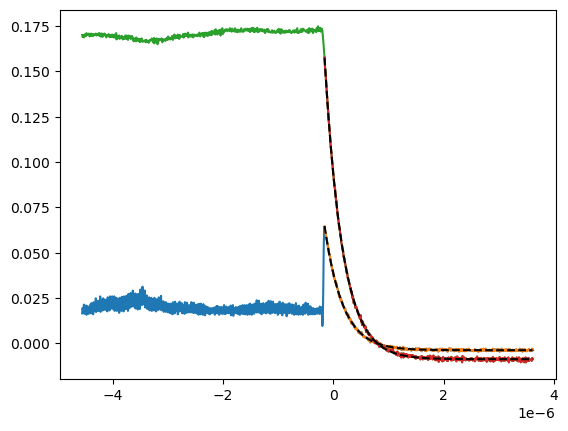

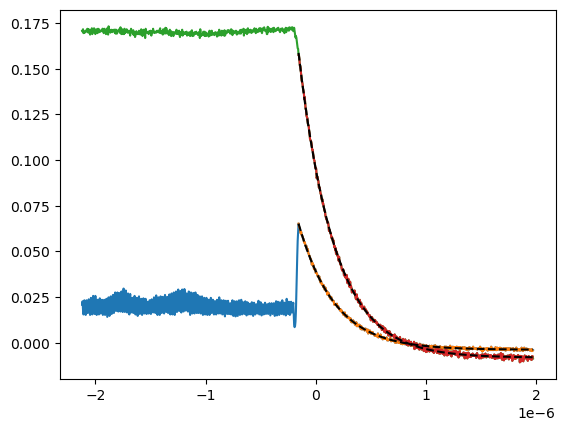

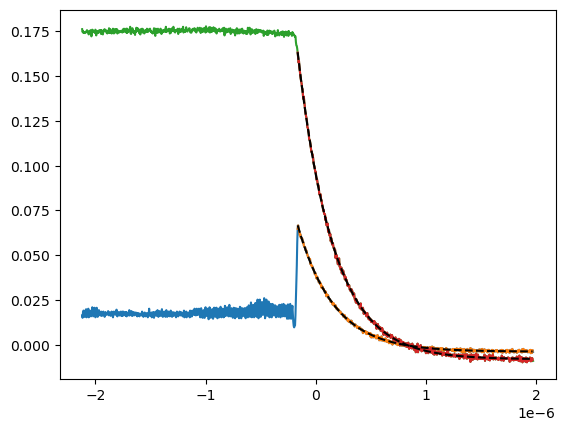

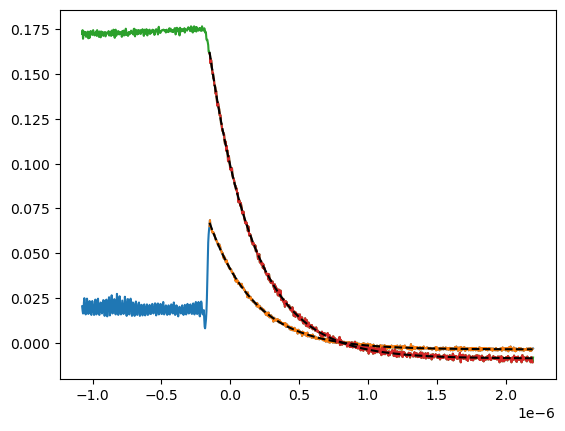

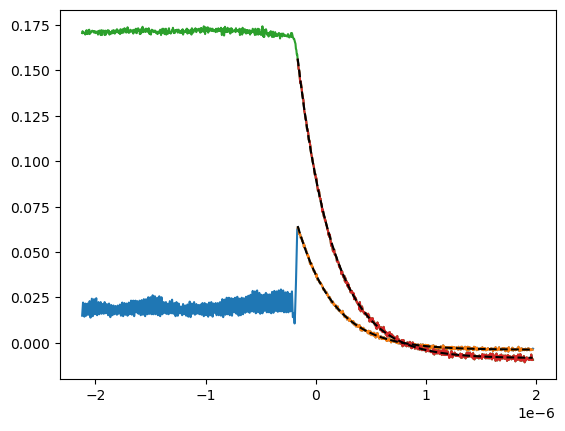

In [82]:
data_set = glob.glob(r"C:\Users\torre\Nextcloud\GQuEST\B102\Output Filter Cavity\multiple_775_ringdowns\*.csv")

finesse_array = []
variance_array = []
j = 0

for i in np.arange(len(data_set)):
    j+=1
    print(j)
    data = moku_read_Probe_Points(data_set[i])
    
    
    
    cutoff_index1 = detect_change_point(data[1])
    cutoff_index_final1 = -1
    
    cutoff_index2 = detect_change_point(data[2])
    cutoff_index_final2 = -1
    
    x_data1 = data[0][cutoff_index1:cutoff_index_final1]
    y_data = data[1][cutoff_index1:cutoff_index_final1]
    
    x_data2 = data[0][cutoff_index1:cutoff_index_final2]
    z_data = data[2][cutoff_index1:cutoff_index_final2]

    c3,a3 = curve_fit(exponential_single,x_data1,y_data,p0=[0.0,8e-7,0.0,0.0])
    c4,a4 = curve_fit(exponential_single,x_data2,z_data,p0=[0.0,8e-7,0.0,0.0])
    
    variance1 = 2*np.pi*3e8/2.4*np.sqrt(np.diag(a3)[1])
    variance2 = 2*np.pi*3e8/2.4*np.sqrt(np.diag(a4)[1])
    
    finesse1 = 2*np.pi*3e8/2.4*(c3[1])
    finesse2 = 2*np.pi*3e8/2.4*(c4[1])
    
    finesse_array.append(finesse1)
    finesse_array.append(finesse2)
    
    variance_array.append(variance1)
    variance_array.append(variance2)
    
    # Uncomment for sanity check
    plt.figure(j)
    plt.plot(data[0],data[1])
    plt.plot(x_data1,y_data)
    plt.plot(data[0],data[2])
    plt.plot(x_data2,z_data)
    plt.plot(x_data1,exponential_single(x_data1, *c3),'k--', label='1D Fit')
    plt.plot(x_data2,exponential_single(x_data2, *c4),'k--')
  
average, std = average_and_std(finesse_array,variance_array)
print('finesse of 775 cavity:',average,'+/-',std)
    
    